<a href="https://colab.research.google.com/github/Harrde/Practical-Machine-Learning-Project/blob/main/Python_Final_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Question 1 (50 points): 

"Please answer the following questions as thoroughly as possible to produce correct output and to clearly interpret the results if the question asks for it."
  


In [110]:
### Import Neccessary Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from statistics import * 
import seaborn as sns



In [4]:
### Load the dataset as excel 'titanic.xls'
titanic1 = pd.read_csv('/content/titanic (1).csv')

In [125]:
### Show the head of the dataframe and briefly explain the data
titanic1.head(40)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Older Than 90% Percentile,Outlier
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.000000,0,0,24160,211.3375,B5,S,2,33.427608,"St Louis, MO",False,False
1,1,1,"Allison, Master. Hudson Trevor",male,0.916700,1,2,113781,151.5500,C22 C26,S,11,33.427608,"Montreal, PQ / Chesterville, ON",False,False
2,1,0,"Allison, Miss. Helen Loraine",female,2.000000,1,2,113781,151.5500,C22 C26,S,33.4276,33.427608,"Montreal, PQ / Chesterville, ON",False,False
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1,2,113781,151.5500,C22 C26,S,33.4276,135.000000,"Montreal, PQ / Chesterville, ON",False,False
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1,2,113781,151.5500,C22 C26,S,33.4276,33.427608,"Montreal, PQ / Chesterville, ON",False,False
5,1,1,"Anderson, Mr. Harry",male,48.000000,0,0,19952,26.5500,E12,S,3,33.427608,"New York, NY",False,True
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1,0,13502,77.9583,D7,S,10,33.427608,"Hudson, NY",True,True
7,1,0,"Andrews, Mr. Thomas Jr",male,39.000000,0,0,112050,0.0000,A36,S,33.4276,33.427608,"Belfast, NI",False,False
8,1,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2,0,11769,51.4792,C101,S,D,33.427608,"Bayside, Queens, NY",True,True
9,1,0,"Artagaveytia, Mr. Ramon",male,71.000000,0,0,PC 17609,49.5042,33.4276,C,33.4276,22.000000,"Montevideo, Uruguay",True,True


Titanic 1 Data Set Explained.

*   pclass - indicator for socio-economic class for each patient 
*   survived - This value identified if the patient lived or not 
*   name - Name of the patient 
*   sex - gender of patient 
*   age - age of patient 
*   sibsp - # siblings indicated 
*   parch - # parents indicated
*   Ticket - Unique Identifier (Ticket Number)
*   fare - Cost of the Ticket $
*   cabin - patients home location 
*   embarked - Cargo deportion (CQS)
*   boat - size of boat
*   body - dead or alive and size of body
*   home.dest - The patients home location 


In [6]:
### Return some info on the data and briefly explain what the categories mean
titanic1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1301 non-null   int64  
 1   survived   1301 non-null   int64  
 2   name       1301 non-null   object 
 3   sex        1301 non-null   object 
 4   age        1040 non-null   float64
 5   sibsp      1301 non-null   int64  
 6   parch      1301 non-null   int64  
 7   ticket     1300 non-null   object 
 8   fare       1300 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1299 non-null   object 
 11  boat       486 non-null    object 
 12  body       118 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 142.4+ KB


In [7]:
### Describe the main statistical features of the data 
titanic1.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1301.000000,1301.000000,1040.000000,1301.000000,1301.000000,1300.000000,118.000000
mean,2.290546,0.384320,29.902083,0.499616,0.387394,33.427608,156.898305
std,0.838577,0.486621,14.430969,1.044123,0.867691,51.890374,95.731229
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,70.500000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.456250,151.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,248.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,327.000000




*   Count - total count of observations that are "non-null values"
*   mean - Average calculation 
*   std - sd value of observations
*   min - Select Min (titanic1.minn())
*   25% - Values broken down into the 25%
*   50% - Values broken down into the 50%
*   75% - Values broken down into the 75%
*   Max - Select Max (titanic1.max())



In [8]:
### Include 50% to 100% perentile with 5% increments for the 'age; column in the describe method output
titanic1['age'].describe(percentiles=[0.5,1])

count    1040.000000
mean       29.902083
std        14.430969
min         0.166700
50%        28.000000
100%       80.000000
max        80.000000
Name: age, dtype: float64

In [21]:
### WHat is the 80% percentile of the age column?
titanic1['age'].describe(percentiles=[.8])

count    1040.000000
mean       29.902083
std        14.430969
min         0.166700
50%        28.000000
80%        42.000000
max        80.000000
Name: age, dtype: float64

In [22]:
### Create a sub dataframe where the age of passengers is above 80% percentile calculated above 

agerange80 = titanic1[titanic1.age > titanic1.age.quantile(.8)]

print(agerange80.to_string())

      pclass  survived                                                               name     sex   age  sibsp  parch             ticket      fare            cabin embarked boat   body                                           home.dest
5          1         1                                                Anderson, Mr. Harry    male  48.0      0      0              19952   26.5500              E12        S    3    NaN                                        New York, NY
6          1         1                                  Andrews, Miss. Kornelia Theodosia  female  63.0      1      0              13502   77.9583               D7        S   10    NaN                                          Hudson, NY
8          1         1                      Appleton, Mrs. Edward Dale (Charlotte Lamson)  female  53.0      2      0              11769   51.4792             C101        S    D    NaN                                 Bayside, Queens, NY
9          1         0                              

In [24]:
### Count the number of passengers in the first class 
print(agerange80[agerange80['pclass'] == 1])

#Answer 
119

     pclass  survived  ...   body                         home.dest
5         1         1  ...    NaN                      New York, NY
6         1         1  ...    NaN                        Hudson, NY
8         1         1  ...    NaN               Bayside, Queens, NY
9         1         0  ...   22.0               Montevideo, Uruguay
10        1         0  ...  124.0                      New York, NY
..      ...       ...  ...    ...                               ...
311       1         1  ...    NaN                    Youngstown, OH
312       1         0  ...    NaN                   Elkins Park, PA
314       1         1  ...    NaN                   Elkins Park, PA
316       1         0  ...    NaN  Geneva, Switzerland / Radnor, PA
321       1         0  ...    NaN                       Halifax, NS

[119 rows x 14 columns]


In [26]:
### Create a new colum called 'older than 90% percentile' where it;s trye/false if the passenger is older/younger than the 90% percentile

titanic1['Older Than 90% Percentile'] = np.where((titanic1.age > titanic1.age.quantile(.9) ), 'True','False')
print(titanic1.to_string())

      pclass  survived                                                                                name     sex      age  sibsp  parch              ticket      fare            cabin embarked     boat   body                                           home.dest Older Than 90% Percentile
0          1         1                                                       Allen, Miss. Elisabeth Walton  female  29.0000      0      0               24160  211.3375               B5        S        2    NaN                                        St Louis, MO                     False
1          1         1                                                      Allison, Master. Hudson Trevor    male   0.9167      1      2              113781  151.5500          C22 C26        S       11    NaN                     Montreal, PQ / Chesterville, ON                     False
2          1         0                                                        Allison, Miss. Helen Loraine  female   2.0000      1      

In [29]:
### Group the 'fare' column by the class of passenger and get the mean fare price for each class

data = titanic1.groupby('pclass', as_index=False)['fare'].mean()

print(data.to_string())

data.head()

   pclass       fare
0       1  87.508992
1       2  21.179196
2       3  13.319785


,pclass,fare
0,1,87.508992
1,2,21.179196
2,3,13.319785


AxesSubplot(0.125,0.125;0.775x0.755)


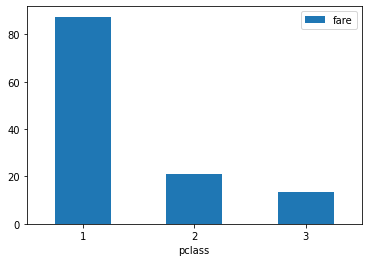

In [31]:
### Plot the bar chart for the avg fare grouped by class 

print(data.plot.bar(x='pclass', y='fare', rot=0))

In [38]:
### Getting the number of outliers: define the upper bound and lower bound for the 'fare' column at 95% or 5% and count how many passengers are considered outliers"

#Defining upper and lower bound 
Q1 = titanic1['fare'].quantile(0.5)
Q3 = titanic1['fare'].quantile(0.95)

#Create Outlier columns with T/F indicators 
outlier = titanic1['Outlier'] = titanic1['fare'].between(Q1, Q3)
outlier.head(30)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9      True
10    False
11    False
12     True
13     True
14     True
15     True
16    False
17    False
18     True
19     True
20     True
21     True
22     True
23    False
24    False
25     True
26     True
27     True
28    False
29     True
Name: fare, dtype: bool

In [53]:
### Replace outliers in the dataframe by the mean of the 'fare' column"

#Getting Mean 
mean = titanic1["fare"].mean()
print(mean)


#Bring in outliers 
data1 = np.where((titanic1.fare > titanic1.fare.quantile(.95)) & (titanic1.fare < titanic1.fare.quantile(.5)))
print(data1)

#Transform Outliers with NA 
datafinal = titanic1.fillna(mean, inplace = True)

33.427608461538625
(array([], dtype=int64),)
None


In [111]:
### Load the contents of 'titanic2.csv', look at the head of the data for its structure and combine it with the previous dataframe"

titanic2 = pd.read_csv('/content/titanic2 (1).csv')

print(titanic2.to_string())

titanic2.info()

   pclass  survived                                     name     sex   age  sibsp  parch  ticket     fare  cabin embarked  boat   body  home.dest
0       3         1  Yasbeck, Mrs. Antoni (Selini Alexander)  female  15.0      1      0    2659  14.4542    NaN        C   NaN    NaN        NaN
1       3         0                     Youseff, Mr. Gerious    male  45.5      0      0    2628   7.2250    NaN        C   NaN  312.0        NaN
2       3         0                        Yousif, Mr. Wazli    male   NaN      0      0    2647   7.2250    NaN        C   NaN    NaN        NaN
3       3         0                    Yousseff, Mr. Gerious    male   NaN      0      0    2627  14.4583    NaN        C   NaN    NaN        NaN
4       3         0                     Zabour, Miss. Hileni  female  14.5      1      0    2665  14.4542    NaN        C   NaN  328.0        NaN
5       3         0                    Zabour, Miss. Thamine  female   NaN      1      0    2665  14.4542    NaN        C   

In [112]:
#Change Data Type & Combination Code 
titanic2['ticket'] = titanic2['ticket'].apply(str)

#Combine Data
Final = pd.concat([titanic1,titanic2])

print(Final)

    pclass  survived  ... Older Than 90% Percentile Outlier
0        1         1  ...                     False   False
1        1         1  ...                     False   False
2        1         0  ...                     False   False
3        1         0  ...                     False   False
4        1         0  ...                     False   False
..     ...       ...  ...                       ...     ...
4        3         0  ...                       NaN     NaN
5        3         0  ...                       NaN     NaN
6        3         0  ...                       NaN     NaN
7        3         0  ...                       NaN     NaN
8        3         0  ...                       NaN     NaN

[1310 rows x 16 columns]


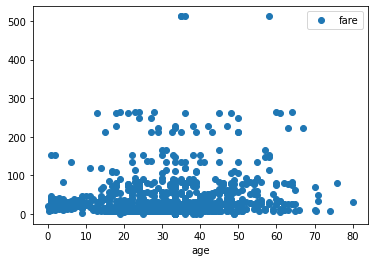

In [113]:
### Plot a scatter plot of 'age' vs 'fare' for your data and calculate the correlation between these two columns"

#Scatter Plot 
Final.plot(x='age',y='fare', style = 'o')

In [65]:
#Calculations
Final['age'].corr(Final['fare'])

#Answer
0.15627526431129604


0.15627526431129604

In [126]:
### Drop 'name', 'cabin', 'boat', 'body','home.dest', 'embarked', 'ticket' columns"

#Dropping Columns from Data Set 
FinalData = Final.drop(index=False, columns = ['ticket','name','body','boat','home.dest','embarked','cabin'])
print(FinalData.to_string())

      pclass  survived     sex        age  sibsp  parch        fare Older Than 90% Percentile Outlier
1          1         1    male   0.916700      1      2  151.550000                     False   False
2          1         0  female   2.000000      1      2  151.550000                     False   False
3          1         0    male  30.000000      1      2  151.550000                     False   False
4          1         0  female  25.000000      1      2  151.550000                     False   False
5          1         1    male  48.000000      0      0   26.550000                     False    True
6          1         1  female  63.000000      1      0   77.958300                      True    True
7          1         0    male  39.000000      0      0    0.000000                     False   False
8          1         1  female  53.000000      2      0   51.479200                      True    True
9          1         0    male  71.000000      0      0   49.504200               

In [ ]:
### Filling missing data in 'age' column by using an educated guess:"

In [132]:
### Write a function that takes two columns, 'age' and 'pclass', as input and depending on which pclass, if the age is NaN (command: pd.isnull(age)   ) it returns age 40, 30 or 25. For example, if input is [NaN, 1], it returns age = 40"

def na_age(cols):
    age = cols[0]
    pclass = cols[1]

    if pd.isnull(age):
      if pclass == 1:
        return 25
      elif pclass == 2:
        return 40
      else:
        return 30
    else:
      return age

In [133]:
### Use apply to clean up age database for NaN using the function created above"

FinalData['age'] = FinalData[['age','pclass']].apply(na_age, axis = 1)

In [135]:
### In the 'fare' column, isolate and display the row where there is NaN"
NAN_Objects = FinalData[FinalData['fare'].isnull()]
NAN_Objects.head()

,pclass,survived,sex,age,sibsp,parch,fare,Older Than 90% Percentile,Outlier


In [136]:
### Using apply fuction, convert the data in 'sex' column to zeros and ones: if female, replace by 1, otherwise by 0"

FinalData1 = FinalData['sex'].map(
    {'female':1, 'male':0})


In [137]:
### Display the top rows for 'sex' column"
FinalData1.head()

1    0
2    1
3    0
4    1
5    0
Name: sex, dtype: int64

In [138]:
### Confirm that the contents of the 'sex' column are integers by showing the type of one content (zero's index, first, etc) or using the info command"

FinalData1.describe()

count    1308.000000
mean        0.355505
std         0.478849
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [139]:
### In 'fare' column, replace NaN with the mean of the column"

#Get Average 
mean = FinalData["fare"].mean()

#Fill missing values with average 
FinalData.fillna(mean, inplace = True)

FinalData.head(10)

,pclass,survived,sex,age,sibsp,parch,fare,Older Than 90% Percentile,Outlier
1,1,1,male,0.9167,1,2,151.5500,False,False
2,1,0,female,2.0000,1,2,151.5500,False,False
3,1,0,male,30.0000,1,2,151.5500,False,False
4,1,0,female,25.0000,1,2,151.5500,False,False
5,1,1,male,48.0000,0,0,26.5500,False,True
6,1,1,female,63.0000,1,0,77.9583,True,True
7,1,0,male,39.0000,0,0,0.0000,False,False
8,1,1,female,53.0000,2,0,51.4792,True,True
9,1,0,male,71.0000,0,0,49.5042,True,True
10,1,0,male,47.0000,1,0,227.5250,False,False


In [140]:
### Drop any leftover NaN in the dataframe"

#Dropping leftover NaN values 
FinalDataComp = FinalData.dropna()

In [141]:
### Display the head of cleaned dataframe"

FinalDataComp.head()

,pclass,survived,sex,age,sibsp,parch,fare,Older Than 90% Percentile,Outlier
1,1,1,male,0.9167,1,2,151.55,False,False
2,1,0,female,2.0000,1,2,151.55,False,False
3,1,0,male,30.0000,1,2,151.55,False,False
4,1,0,female,25.0000,1,2,151.55,False,False
5,1,1,male,48.0000,0,0,26.55,False,True
